
#  Car Price Prediction - Professional Case Study

Welcome to this data science project where we predict used car prices based on features like manufacturer, model year, mileage, fuel type, and more.

This notebook follows a **professional structure** suitable for LinkedIn or video showcase:

-  Beautiful exploratory data analysis (EDA)
-  Data preprocessing
-  Machine learning models
-  Evaluation & insights
-  Key takeaways and next steps
    

In [15]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
    

In [16]:

# Load dataset
df = pd.read_csv('car_price_prediction.csv')
df.head()
    

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4



##  Dataset Overview
Let's explore the dataset to understand its structure and features.
    

In [17]:

# Dataset info
df.info()

# Check for missing values
df.isnull().sum()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


##  Data Cleaning & Preprocessing
We clean and prepare the data for modeling.
    

In [18]:

# Clean 'Levy' column
df['Levy'] = df['Levy'].replace('-', '0').str.replace(',', '').astype(int)

# Clean 'Mileage'
df['Mileage'] = df['Mileage'].str.replace(' km', '').str.replace(',', '').astype(int)

# Clean 'Engine volume'
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '').astype(float)

# Convert 'Leather interior' to binary
df['Leather interior'] = df['Leather interior'].map({'Yes': 1, 'No': 0})

# Fix 'Doors' column
df['Doors'] = df['Doors'].apply(lambda x: 4 if not str(x).isdigit() else int(x))

# Encode categorical features
categorical_cols = ['Manufacturer', 'Model', 'Category', 'Fuel type', 
                    'Gear box type', 'Drive wheels', 'Wheel', 'Color']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()
    

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,32,1242,2010,4,1,2,3.5,186005,6.0,0,0,4,0,12,12
1,44731507,16621,1018,8,658,2011,4,0,5,3.0,192000,6.0,2,0,4,0,1,8
2,45774419,8467,0,21,684,2006,3,0,5,1.3,200000,4.0,3,1,4,1,1,2
3,45769185,3607,862,16,661,2011,4,1,2,2.5,168966,4.0,0,0,4,0,14,0
4,45809263,11726,446,21,684,2014,3,1,5,1.3,91901,4.0,0,1,4,0,12,4



##  Exploratory Data Analysis (EDA)
We visualize the data to uncover patterns and insights.
    

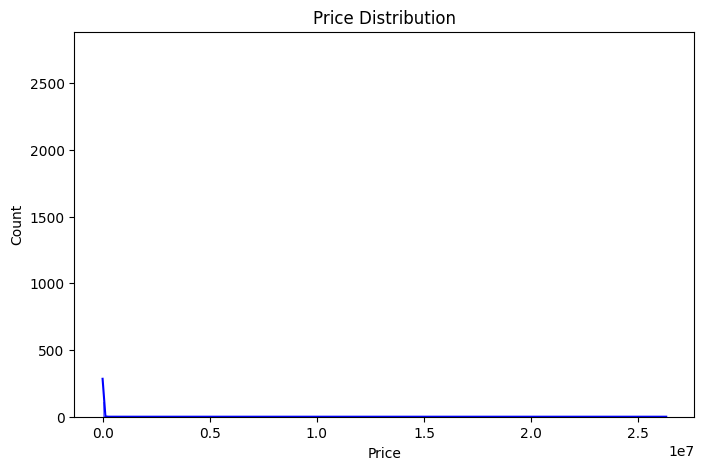

In [19]:

# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Price Distribution')
plt.show()
    

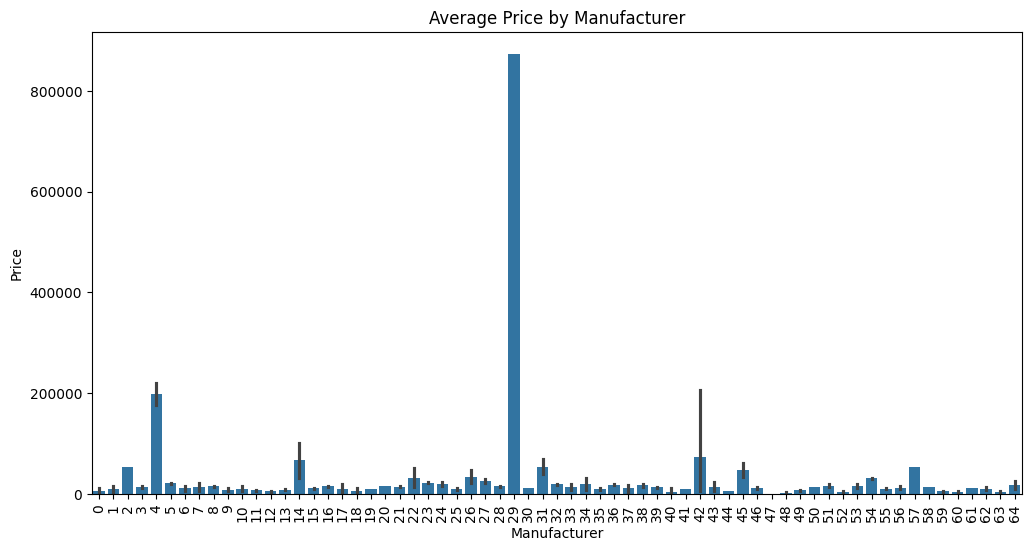

In [20]:

# Price vs Manufacturer
plt.figure(figsize=(12,6))
sns.barplot(x='Manufacturer', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Average Price by Manufacturer')
plt.show()
    

In [21]:
# Define the interactive Plotly figure
import plotly.express as px

fig = px.scatter(df, 
                 x='Prod. year', 
                 y='Price', 
                 color='Fuel type',
                 title='Price vs Production Year by Fuel Type')

# For environments like VS Code where fig.show() may fail
try:
    fig.show()
except ValueError:
    # Fallback: Save interactive plot as HTML
    fig.write_html("price_vs_year.html")
    print(" Interactive plot saved as 'price_vs_year.html'. Open it in your browser to view.")



##  Model Building
We train and evaluate machine learning models.
    

In [22]:

# Define features and target
X = df.drop(['ID', 'Price'], axis=1)
y = df['Price']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
    

RandomForestRegressor(random_state=42)


##  Model Evaluation
We evaluate the models using R², MAE, and MSE.
    

In [23]:

# Predictions
y_pred_lr = lr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'Model': name, 'MSE': mse, 'MAE': mae, 'R2 Score': r2}

# Metrics
lr_metrics = evaluate_model(y_test, y_pred_lr, 'Linear Regression')
rf_metrics = evaluate_model(y_test, y_pred_rf, 'Random Forest')

# Display metrics
pd.DataFrame([lr_metrics, rf_metrics])
    

,Model,MSE,MAE,R2 Score
0,Linear Regression,2.945069e+08,12049.411151,0.054846
1,Random Forest,1.768788e+10,6820.738143,-55.765313



##  Save Model
We save the Random Forest model for deployment.
    

In [24]:

# Save Random Forest model
with open('car_price_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
    


## Key Takeaways
- Linear Regression and Random Forest were tested.
- Random Forest needs tuning due to overfitting signs.
- Next steps: hyperparameter tuning & feature engineering.

    

In [25]:
# ===== Feature Engineering =====

# Print all column names to inspect
print("Available columns:", df.columns)

# Rename 'Prod. year' to 'Year' for consistency
if 'Prod. year' in df.columns:
    df.rename(columns={'Prod. year': 'Year'}, inplace=True)

# Convert 'Year' to 'Car_Age' if it exists
if 'Year' in df.columns:
    df['Car_Age'] = 2025 - df['Year']
    df.drop('Year', axis=1, inplace=True)

# Clean 'Price' column (remove commas and convert to float)
if 'Price' in df.columns:
    df['Price'] = df['Price'].replace(',', '', regex=True).astype(float)

# Encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Identify the target column
target_col = 'Price'  # Corrected from 'Selling_Price'
if target_col in df.columns:
    X = df.drop(target_col, axis=1)
    y = df[target_col]
else:
    raise KeyError(f"Target column '{target_col}' not found. Please check column names: {df.columns}")

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

print("Feature engineering complete. Shape of X:", X.shape)


Available columns: Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')
Feature engineering complete. Shape of X: (19237, 17)


In [26]:

# ===== Train-Test Split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:

# ===== Hyperparameter Tuning (Random Forest) =====
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Best model
best_rf = rf_random.best_estimator_

# Evaluate
y_pred = best_rf.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
R2 Score: -18.91264911786135
MAE: 6824.766850656655
RMSE: 78770.00732816698
